#### Análise de tweets: Desastre ou não?
- Este é um projeto de ciência de dados de ponta a ponta (da coleta de dados ao deploy), que tem como objetivo <b>analisar</b> um conjunto de <b>tweets</b> e <b>prever a probabilidade de um tweet estar relacionado a um desastre real.</b> Portanto, trata-se de um problema de classificação binária (aprendizado supervisionado, conjunto de dados rotulado) no qual a variável dependente é 1 para o caso de tweets relacionados a desastres reais e 0 para tweets não relacionados.
- O pipeline de solução, com base no framework <B>CRISP-DM</b>, consiste dos seguintes <b>passos:</b><br>

    <b>0. Entendimento do problema de negócio.</b><br>
    <b>1. Entendimento dos dados.</b><br>
    <b>2. Preparação dos dados.</b><br>
    <b>3. Modelagem.</b><br>
    <b>4. Avaliação.</b><br>
    <b>5. Deploy/Implantação.</b><br>

- Neste notebook, será realizada uma <b>análise exploratória de dados</b>, cobrindo os passos 1 e 2 do framework supracitado. O objetivo dessa análise é <b>identificar padrões e insights</b> nos dados que revelem as características e nuances presentes em tweets reais de desastres e tweets que não correspondem a desastres. 
- Antes de tudo, é importante definir as perguntas a serem feitas aos dados, a fim de atingir o objetivo e não se perder no meio do processo.
- Perguntas de negócio a serem respondidas:
- 1. Qual é a distribuição da variável dependente - tweets relacionados e não relacionados a desastres?
- 2. Existe alguma relação entre o tamanho do texto e a probabilidade de um tweet estar relacionado a um desastre?
- 3. Quais são as palavras-chave mais frequentes associadas aos tweets de desastres? E aos tweets não relacionados a desastres? E as menos frequentes?
- 4. Quais são as palavras mais frequentes associadas aos tweets de desastres? E aos tweets não relacionados a desastres? Existe alguma diferença considerando os textos limpos e os textos da forma original?
- 5. Quais tendências, representadas por hashtags, são mais frequentes entre tweets relacionados a desastres? E entre os tweets não relacionados a desastres?
- 6. Qual é a emoção dominante nos tweets relacionados a desastres e não relacionados a desastres?
- Finalmente, cada decisão tomada será justificada e explicada abaixo, de forma que o racional por trás das ações esteja bem definido.

#### 0. Entendimento do problema de negócio

- O Twitter tornou-se um canal de comunicação importante em tempos de emergência.​
- A onipresença dos smartphones permite que as pessoas anunciem uma emergência que estão observando em tempo real. ​
- Devido a isso, mais agências estão interessadas em monitorar o Twitter de forma programática (ou seja, organizações de auxílio em desastres e agências de notícias).​ Uma delas é a Agência de Apoio a Catástrofes (AAC).
- No entanto, nem sempre é claro se as palavras de uma pessoa estão realmente anunciando um desastre. Considere o exemplo no final do bloco:​
    - O autor usa explicitamente a palavra "ABLAZE" (em português “Em Chamas”) no seu tweet, mas de forma metafórica, visto que era somente para falar sobre o pôr do sol. Isso é claro para um humano, no entanto, é menos claro para uma máquina.
- Contexto:​
    - Você é um estagiário na Agência de Apoio a Catástrofes (AAC), que desenvolve soluções de análise de dados. Seu desafio é analisar um conjunto de tweets para determinar quais estão relacionados a desastres reais e quais não estão. Este é um problema clássico de classificação binária.
- Objetivo:​
    - Usar técnicas de manipulação de dados, processamento de linguagem natural (NLP), Estatística e de Machine Learning para analisar e prever a probabilidade de um tweet estar relacionado a desastres reais.
    - Aqui, adotaremos a abordagem de prever a probabilidade, levando em consideração a informação de confiança. Isso nos permite avaliar quão provável é que um determinado tweet represente uma catástrofe real. Tal abordagem facilita a gestão de risco pela Agência de Apoio a Catástrofes (AAC), possibilitando a priorização da atenção para tweets com maior probabilidade. Além disso, reduz a propagação de notícias falsas, uma vez que rótulos binários poderiam classificar erroneamente vários tweets, especialmente ao utilizar pontos de corte mais baixos para a classificação (trade-off precision-recall).
    - Nesse sentido, métricas como ROC-AUC, PR-AUC e Brier Score serão priorizadas. Entretanto, olharemos para diversas outras. Mesmo adotando o critério probabilístico, é interessante obter um bom recall. O recall pode ser interpretado como o alcance, e de fato, é melhor que "alcancemos" o maior número de desastres reais possível.
    
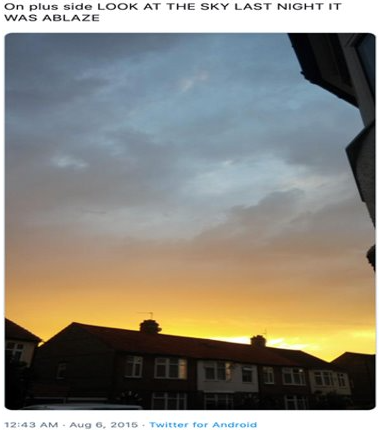

#### 1. Entendimento dos dados
- Aqui, iremos entender inicialmente os nossos dados, isto é, verificar as dimensões, tipos de dados das variáveis, valores nulos e duplicados, entre outros insights iniciais.
- Posteriormente, entraremos mais a fundo na análise exploratória de dados, a fim de desvendar padrões ocultos com técnicas de nlp e manipulações.

#### 1.0 Importando as bibliotecas

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Cleaning and preparation.
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from spellchecker import SpellChecker
from collections import Counter
from textblob import TextBlob

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

# Visualize all the columns.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peedr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\peedr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\peedr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### 1.1 Coleta dos dados
- Os dados para este projeto estão organizados em três arquivos distintos:
    - train.csv: Este é o arquivo da Base de Dados de Treinamento. Ele contém os dados para treinar o modelo, incluindo características e variáveis-alvo.​
    - test.csv: Este arquivo constitui a Base de Dados de Teste. Ele é usado para testar a eficácia do modelo, fornecendo um conjunto de dados sem as respostas ou variáveis-alvo.​
    - sample_submission.csv: Este arquivo serve como uma Base contendo as respostas para o test.csv. Ele é utilizado principalmente para formatar as previsões no formato correto para uma possível submissão ou validação.​
- Uma observação importante é que o conjunto de testes fornecido não possui as respostas para mensuração de performance direta neste momento. Portanto, será necessário obter outro conjunto de testes rotulado a partir do treino, que será isolado do treinamento, a fim de simular o ambiente de produção (dados de tweets reais que virão, os quais nosso modelo nunca viu).

- Dicionário de dados:
    - id: Identificador único do tweet.​
    - keyword: Palavra-chave associada ao tweet.​
    - location: Localização de onde o tweet foi postado.​
    - text: Texto do tweet.​
    - target: Categoria do tweet (0 ou 1).​

In [2]:
# Reading the data.
train_path = '../input/train.csv'
test_path = '../input/test.csv'
sample_path = '../input/sample_submission.csv'
df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_df = pd.read_csv(sample_path)

In [3]:
test_df.head()

,id,keyword,location,text
0,8227,riot,#sundaunited,I'm Role Play of Ulzzang Park Hyung Seok. 92 L...
1,1000,blazing,bkk,The midnight song I cry out goes 'In reality I...
2,3781,destruction,Hollywood,Russian authorities to take account of petitio...
3,2011,casualties,Ellixton London's 33rd Borough,Warfighting Robots Could Reduce Civilian Casua...
4,8336,rubble,California,China's Stock Market Crash: Are There Gems In ...


In [4]:
a = df.loc[df['target'] == 1]['text']
a[4]

'wild night in the village of pugwash every fire truck is out that the town has which is like a fire truck for every house -population:6'

In [5]:
df.head()

,id,keyword,location,text,target
0,1118,blew%20up,"Brooklyn, NY",@YahooSchwab easy way to look good after the R...,0
1,1558,bomb,NaN,@dopeitsval ahh you're bomb baby ??,0
2,4830,evacuation,NaN,Run out evacuation hospital indexing remedial ...,1
3,3674,destroy,Trackside California,Wow Crackdown 3 uses multiple servers in multi...,0
4,5368,fire%20truck,NaN,wild night in the village of pugwash every fir...,1


- Aparentemente, será necessário realizar uma limpeza nos dados, observe "%20" nas keywords, que não indica nada - um espaço? E no text, o @ dos usuários presente. Vamos obter uma amostra aleatória de 15 elementos para observar mais possíveis nuances abaixo.

In [6]:
df.sample(15)

,id,keyword,location,text,target
4994,9886,traumatised,London,I'm so sad Kids Company has closed. After all ...,0
2133,7431,obliterated,"Miami, FL",I can't wait to be beyond obliterated this wee...,0
857,8162,rescuers,London,VIDEO: 'We're picking up bodies from water': R...,1
147,3587,desolate,Temporary Towers,@fotofill It looks so desolate. End of the wor...,0
4329,1318,bloody,NaN,Meet the bloody RS5 http://t.co/RVczMimfVx,0
6824,10800,wrecked,Milwaukee County,http://t.co/DeQQOpSP4f: Iger's 3 words that wr...,0
278,1029,bleeding,NaN,Ways so archetype a bleeding well-grounded rea...,0
7324,2377,collapsed,"Kingston, Jamaica",Another entity forced to close in Montego Bay ...,1
916,9445,terrorism,NaN,Truth...\nhttps://t.co/h6amECX5K7\n#News\n#BBC...,0
2936,5647,flooding,NaN,@crabbycale OH MY GOD THE MEMORIES ARE FLOODIN...,0


- Claramente deverá ser realizada uma limpeza. Aparentemente '%20' corresponde a espaços, location não possui padronização e guarda alguns valores nulos, e text possui endereços de sites 'http'.

#### 1.2 Informações gerais sobre o dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui 7613 linhas e 5 colunas.


- É possível perceber que temos valores nulos em location, os tipos de dados estão corretos, e dispomos de 7613 tweets para análise e modelagem.
- Há apenas variáveis categóricas, exceto pelo target, que já está em formato binário.
- De antemão, é possível remover a coluna id, dado que ela possui um valor distinto para cada observação, sendo irrelevante na análise e podendo introduzir data leakage na modelagem.

#### 1.3 Valores nulos e duplicados

In [9]:
isna_df = df.isna().sum().to_frame().rename(columns={0: 'count'})
isna_df['pct'] = isna_df['count'] / len(df) * 100
isna_df.sort_values(by=['pct'], ascending=False)

,count,pct
location,2533,33.272035
keyword,61,0.801261
id,0,0.000000
text,0,0.000000
target,0,0.000000


In [10]:
print(f'Observações duplicadas: {df.duplicated().sum()}.')
print(f'Ids duplicados: {df.id.duplicated().sum()}')

Observações duplicadas: 0.
Ids duplicados: 0


- 33% das observações em location possuem dados nulos, enquanto que em keyword esse percentual é de apenas 0.8%. 
- Dado o baixo percentual de nulos em keyword, iremos imputar com a moda para a análise. Não irei remover essas observações, pois dados são valiosos!
- Não há observações duplicadas.
- A coluna location possui uma cardinalidade muito alta, com categorias representando o mesmo lugar aparecendo das mais variadas formas, além de um percentual alto de nulos. Portanto, ela será removida.

In [11]:
keyword_mode = df['keyword'].mode()[0]
df['keyword'].fillna(keyword_mode, inplace=True)

In [12]:
print(f'Cardinalidade de location: {df.location.nunique()}')
print(f'Valores mais frequentes de location: {df.location.value_counts(normalize=True)}')

Cardinalidade de location: 3341
Valores mais frequentes de location: location
USA                        0.020472
New York                   0.013976
United States              0.009843
London                     0.008858
Canada                     0.005709
                             ...   
Itirapina, SÌ£o Paulo      0.000197
English Midlands           0.000197
Amman,Jordan               0.000197
Midwestern USA             0.000197
New York, United States    0.000197
Name: proportion, Length: 3341, dtype: float64


In [13]:
to_drop = ['id', 'location']
df = df.drop(columns=to_drop)

#### 2. Limpeza dos dados e feature engineering
- Antes de realizar a análise exploratória, devemos realizar algumas tarefas de limpeza. Como visto acima, há inconsistências como símbolos sem relevância e links dentro das mensagens. Além disso, variáveis novas devem ser criadas para extrair mais informação sobre o problema a partir dos dados que temos.
1. Em tarefas de NLP, é comum criar uma coluna 'text_length', que identificará o tamanho do texto. Isso poderá fornecer insights ao longo de tweets relacionados a desastres e tweets não relacionados.
2. Irei remover os links presentes nos textos para não danificar a semântica, introduzir ruído, ou prejudicar a obtenção de insights.
3. Irei remover tags_html pelos mesmos motivos acima. Da mesma forma, nomes de usuário serão excluídos, também por motivos de ética. As '#' não serão removidas pois no contexto do twitter indicam tendências e podem ajudar a discriminar entre desastres e não desastres.
4. Irei converter os textos para lowercase e remover pontuações a fim de padronizar o formato, reduzir a dimensionalidade e garantir consistência nas análises semânticas. Elementos especiais como '[]' também são removidos.
5. Tudo isso será feito com expressões regulares, que são padrões de texto que permitem realizar buscas complexas e operações de manipulação em strings. Um cheat sheet de referência será usado: https://www.datacamp.com/cheat-sheet/regular-expresso
6. Irei remover stopwords. Stopwords são palavras comuns, como "e" e "o", que são frequentemente removidas em NLP para reduzir a dimensionalidade e focar em palavras mais informativas, melhorando a eficiência da análise de texto.
7. Irei aplicar a lematização, a fim de manter uma coerência linguística das palavras. A lematização é o processo de reduzir palavras à sua forma base (ou lema), visando simplificar variações morfológicas e facilitar a análise em NLP. Este método garante que toda palavra convertida faz parte da língua inglesa, evitando inconsistências, ao contrário do stemming. Part-of-speech tags são marcações que indicam a classe gramatical de cada palavra (como substantivo, verbo, etc.). Elas serão necessárias para a lematização, pois ajudam a determinar o lema de uma palavra com base em seu contexto gramatical. Um exemplo de lematização seria:
    - Palavra original: "correndo", verbo.
    - Lema: "correr".
    
A lematização é um pouco custosa, mas, considerando que no deploy iremos prever um tweet por vez para fins de resolução do case, e considerando que temos como finalidade também mostrar conhecimento e competência técnica, irei optar por seguir com ela em vez de aplicar stemming.

8. Poderíamos, ainda, aplicar a spell correction/correção ortográfica, que melhora a precisão da análise e pode reduzir a dimensionalidade na modelagem de nlp. Faz sentido aplicar essa técnica antes de operações mais avançadas como lematização, justamente porque ela lida com palavras mal escritas. Por exemplo, "bicicletea" seria corrigida para "bicicleta". Entretanto, foi testado, e ela é ainda mais custosa que a lematização. Além disso, não foram gerados grandes benefícios observando os exemplos. Destarte, iremos prosseguir sem spell correction.
9. Para fins de modularização e organização, todo o pipeline de limpeza aqui aplicado será encapsulado no arquivo "modelling_utils.ipynb" para aplicação de algoritmos de machine learning.

In [14]:
clean_df = df.copy()

In [15]:
# Criando coluna de tamanho de texto.
clean_df['text_length'] = clean_df['text'].str.len()

# Compila um padrão de strings com expressões regulares, então substitui ocorrências desse padrão em uma string passada por espaço vazio, removendo-as.
def reg_ex(string, regex):
    compile = re.compile(regex)
    return compile.sub(r'', string)

# Removendo links e tags html.
# 'https?://\S+|www\.\S+'
# 1. 'https?' identifica se os links começam com 'http' ou 'https'.
# 2. '://' dois pontos e duas barras que seguem desses dois acima.
# 3. '\S+' um ou mais caracteres não brancos, restante do endereço do link.
# 4. '|' operador de alternância, escolhe entre o padrão anterior, 'http' ou 'https', e o próximo padrão.
# 'www\.\S+' corresponde ao padrão 'www.' seguido pelo resto do link, um ou mais caracteres não brancos.
clean_df['clean_text'] = clean_df['text'].apply(lambda x: reg_ex(x, 'https?://\S+|www\.\S+'))
# '<.*?>'
# 1. '<' caractere inicial das tags html.
# 2. '.*' qualquer caractere (.) zero ou mais vezes (*).
# 3. '?' menor sequência possível de caracteres.
# 4. '>' caractere que fecha a tag html.
clean_df['clean_text'] = clean_df['clean_text'].apply(lambda x: reg_ex(x, '<.*?>'))

# Removendo @ de usuários, não possui nenhum significado semântico, introduz ruído e fere a ética.
# A expressão regular '@[\w]*' identifica e remove qualquer sequência que comece com "@" seguida por caracteres alfanuméricos, ou seja, o @ dos usuários.
clean_df['clean_text'] = clean_df['clean_text'].apply(lambda x: reg_ex(x, '@[\w]*'))

# Removendo pontuações, caracteres especiais e números, já convertendo para lowercase.
# '[^a-zA-Z# ]' representa uma classe '[]' de caracteres negada '^...'. Qualquer caractere que não seja uma letra maiúscula ou minúscula 'a-zA-Z' ou '#' ou espaço em branco ' ' será removido.
clean_df['clean_text'] = clean_df['clean_text'].apply(lambda x: str.lower(reg_ex(x, '[^a-zA-Z# ]')))

# Removendo stop words
stop_words = stopwords.words('english')
# Lista de listas, cada lista interior contém os tokens (palavras individuais) de um texto. Cada lista exterior é um texto.
word_tokens = clean_df['clean_text'].apply(lambda x: word_tokenize(x)).tolist()
# Cada texto conterá suas palavras separadas por espaço já removidas stop words.
text_without_stop_words = [' '.join([w for w in word_token_lst if w not in set(stop_words)]) for word_token_lst in word_tokens]
clean_df['clean_text'] = text_without_stop_words

# Aplicando a lematização.
lemmatizer = WordNetLemmatizer()

# Função para realizar POS tagging e lematização
# Part of speech tagging é necessário para lematização.
def lemmatize_with_pos(text):
    # Obtém os tokens/palavras individuais do texto passado em lista.
    word_tokens = word_tokenize(text)
    # Obtém uma tupla com cada token e sua part of speech tag.
    pos_tags = pos_tag(word_tokens)
    # Aplica a lematização a cada palavra considerando que o WordNetLemmatizer espera que as tags POS estejam em formato específico 'a' adjetivo, 'v' verbo, 'n' substantivo, etc.
    lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_words)

# Função para realizar POS tagging e lematização
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # Adjetivo
    elif tag.startswith('V'):
        return 'v'  # Verbo
    elif tag.startswith('N'):
        return 'n'  # Substantivo
    elif tag.startswith('R'):
        return 'r'  # Advérbio
    else:
        return 'n'  # Substantivo padrão

clean_text = clean_df.clean_text.tolist()
words_lemmatized_pos = [lemmatize_with_pos(text) for text in clean_text]
clean_df['clean_text'] = words_lemmatized_pos

In [16]:
# Observando o resultado.
clean_df['clean_text'].sample(15)

3315     fire destroy two building nd street # manchester
859     answer friend isnt blow windits yell survive d...
3110    officer wound suspect kill exchange gunfire ri...
3601    gold coast tram hit fall powerlines people eva...
6118    soldier kill isi suicide bomb air base east ho...
679     wipp facility nm investigate site filter radia...
5729    disaster avert police kill gunman hoax device ...
5868    envision catastrophe would prevent woman place...
5179                 chemical romance desolation row # np
3319    monkey abuse notorious laboratory dealer peta ...
4937    blksampwhts collude take wht f auth hostageamp...
6923           wait see piss donnie tell another accident
2817    couple storm near guthrie ok leave norman even...
6706    feel like ive flatten sumo wrestler pain gain ...
2993    # saudi arabia # abha fatality report follow s...
Name: clean_text, dtype: object

#### 3. Análise exploratória de dados
- Irei analisar os dados a fim de desvendar padrões ocultos acerca de tweets relacionados e não relacionados a desastres naturais. Portanto, análises univariada, bivariada e multivariada serão efetuadas.
- As perguntas a serem respondidas estão definidas abaixo, antes mesmo de começar, a fim de obter as respostas de negócio de interesse e não se perder no vasto espaço de dados.
- 1. Qual é a distribuição da variável dependente - tweets relacionados e não relacionados a desastres?
- 2. Existe alguma relação entre o tamanho do texto e a probabilidade de um tweet estar relacionado a um desastre?
- 3. Quais são as palavras-chave mais frequentes associadas aos tweets de desastres? E aos tweets não relacionados a desastres? E as menos frequentes?
- 4. Quais são as palavras mais frequentes associadas aos tweets de desastres? E aos tweets não relacionados a desastres? Existe alguma diferença considerando os textos limpos e os textos da forma original?
- 5. Quais tendências, representadas por hashtags, são mais frequentes entre tweets relacionados a desastres? E entre os tweets não relacionados a desastres?
- 6. Qual é a emoção dominante nos tweets relacionados a desastres e não relacionados a desastres?

#### 3.1 Qual é a distribuição da variável dependente - tweets relacionados e não relacionados a desastres?

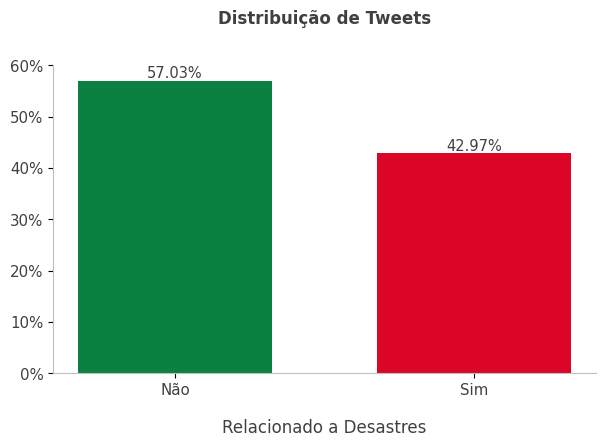

In [17]:
# Agrupando os dados.
disaster_grouped = clean_df.groupby(['target'])[['target']].count().rename(columns={'target': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
disaster_grouped['pct'] = round(disaster_grouped['count'] / np.sum(disaster_grouped['count']) * 100, 2) 

# Plot e customização.
fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.bar(x=disaster_grouped['target'], height=disaster_grouped['pct'], color=[VERDE1, VERMELHO1], width=0.65)
for bar, pct in zip(bars, disaster_grouped['pct']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{pct}%', ha='center', color=CINZA2, fontsize=10.5)
ax.set_title('Distribuição de Tweets', color=CINZA2, fontweight='bold', fontsize=12, pad=30)
ax.set_xlabel('Relacionado a Desastres', labelpad=15, color=CINZA2, fontsize=12)
ax.set_xticks(ticks=disaster_grouped['target'], labels=['Não', 'Sim'], color=CINZA2, fontsize=10.8)
ax.set_yticks(ticks=np.arange(0, 61, 10), labels=['0%', '10%', '20%', '30%', '40%', '50%', '60%'] , color=CINZA2, fontsize=10.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)
plt.show()

- Aproximadamente 43% dos tweets são relacionados a desastres.
- Rigorosamente, há um desbalanceamento de dados, mesmo que não afete tanto a modelagem, uma vez que ele é de baixa magnitude.
- Dito isso, para fins de detalhe e conhecimento, na etapa de modelagem, técnicas como divisão treino-teste estratificada, validação cruzada k-fold estratificada, utilização de hiperparâmetro class_weight e consulta a métricas confiáveis para dados desbalanceados serão aplicadas.
- Amostras estratificadas manterão a proporção de cada classe do target (tweets relacionados a desastres e não relacionados). Dessa forma, será possível realizar uma avaliação de performance confiável, com dados fiéis ao fenômeno real.
- O hiperparâmetro class_weight penalizará o modelo quando ele errar em instâncias da classe minoritária (tweets relacionados a desastres), atribuindo maior custo à função de otimização, resultando em maior atualização de coeficientes, por exemplo, no caso de uma Regressão Logística. Dessa forma, o modelo aprenderá melhor padrões desses tweets.
- A utilização de métricas confiáveis para este caso, como o ROC-AUC e o PR-AUC fornece uma avaliação confiável do modelo. Olhar apenas acurácia é ineficaz e deixa ainda muitas dúvidas sobre o real desempenho do estimador.

#### 3.2 Existe alguma relação entre o tamanho do texto e a probabilidade de um tweet estar relacionado a um desastre?

In [18]:
target_text_len = clean_df.groupby(['target'])['text_length'].describe()
target_text_len

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4342.0,95.706817,35.885924,7.0,68.0,101.0,130.0,157.0
1,3271.0,108.113421,29.309854,14.0,88.0,115.0,136.0,151.0


- A distribuição do tamanho dos textos apresenta algumas diferenças entre os dois tipos de tweet.
- Para tweets relacionados a desastres, temos um tamanho médio de caracteres maior (108.11, contra 95.7 dos tweets não relacionados a desastres). Da mesma forma, o desvio padrão é menor (29.3, contra 36 dos tweets não relacionados a desastres), o que nos indica que, tweets relacionados a desastres tendem a possuir sim, um tamanho maior.
- Metade dos tweets relacionados a desastres possuem mais de 115 caracteres (mediana).
- Vamos analisar o boxplot abaixo, que permite uma comparação visual de ambos os tipos de tweet, e uma visualização dos outliers.

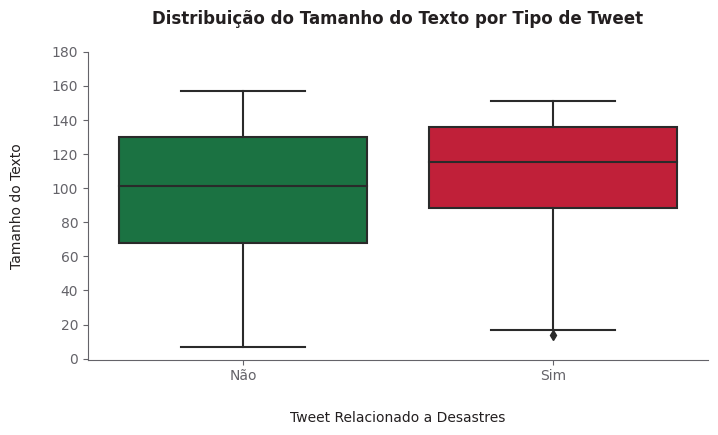

In [19]:
# Plotting and customizing.
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=clean_df, x='target', y='text_length', orient='v', palette=[VERDE1, VERMELHO1], ax=ax)
ax.set_title('Distribuição do Tamanho do Texto por Tipo de Tweet', color=CINZA1, fontweight='bold', pad=20)
ax.set_xticks(range(2))
ax.set_xticklabels(['Não', 'Sim'])
ax.set_ylabel('Tamanho do Texto', color=CINZA1, labelpad=20)
ax.set_xlabel('Tweet Relacionado a Desastres', color=CINZA1, labelpad=20)
ax.set_yticks(ticks=range(0, 181, 20))
ax.tick_params(axis='x', colors=CINZA4)
ax.tick_params(axis='y', colors=CINZA4)
ax.spines['left'].set_color(CINZA4)
ax.spines['bottom'].set_color(CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

- É possível perceber que há uma ligeira diferença. Entretanto, ela não é tão expressiva.

#### 3.3 Quais são as palavras-chave mais frequentes associadas aos tweets de desastres? E aos tweets não relacionados a desastres? 

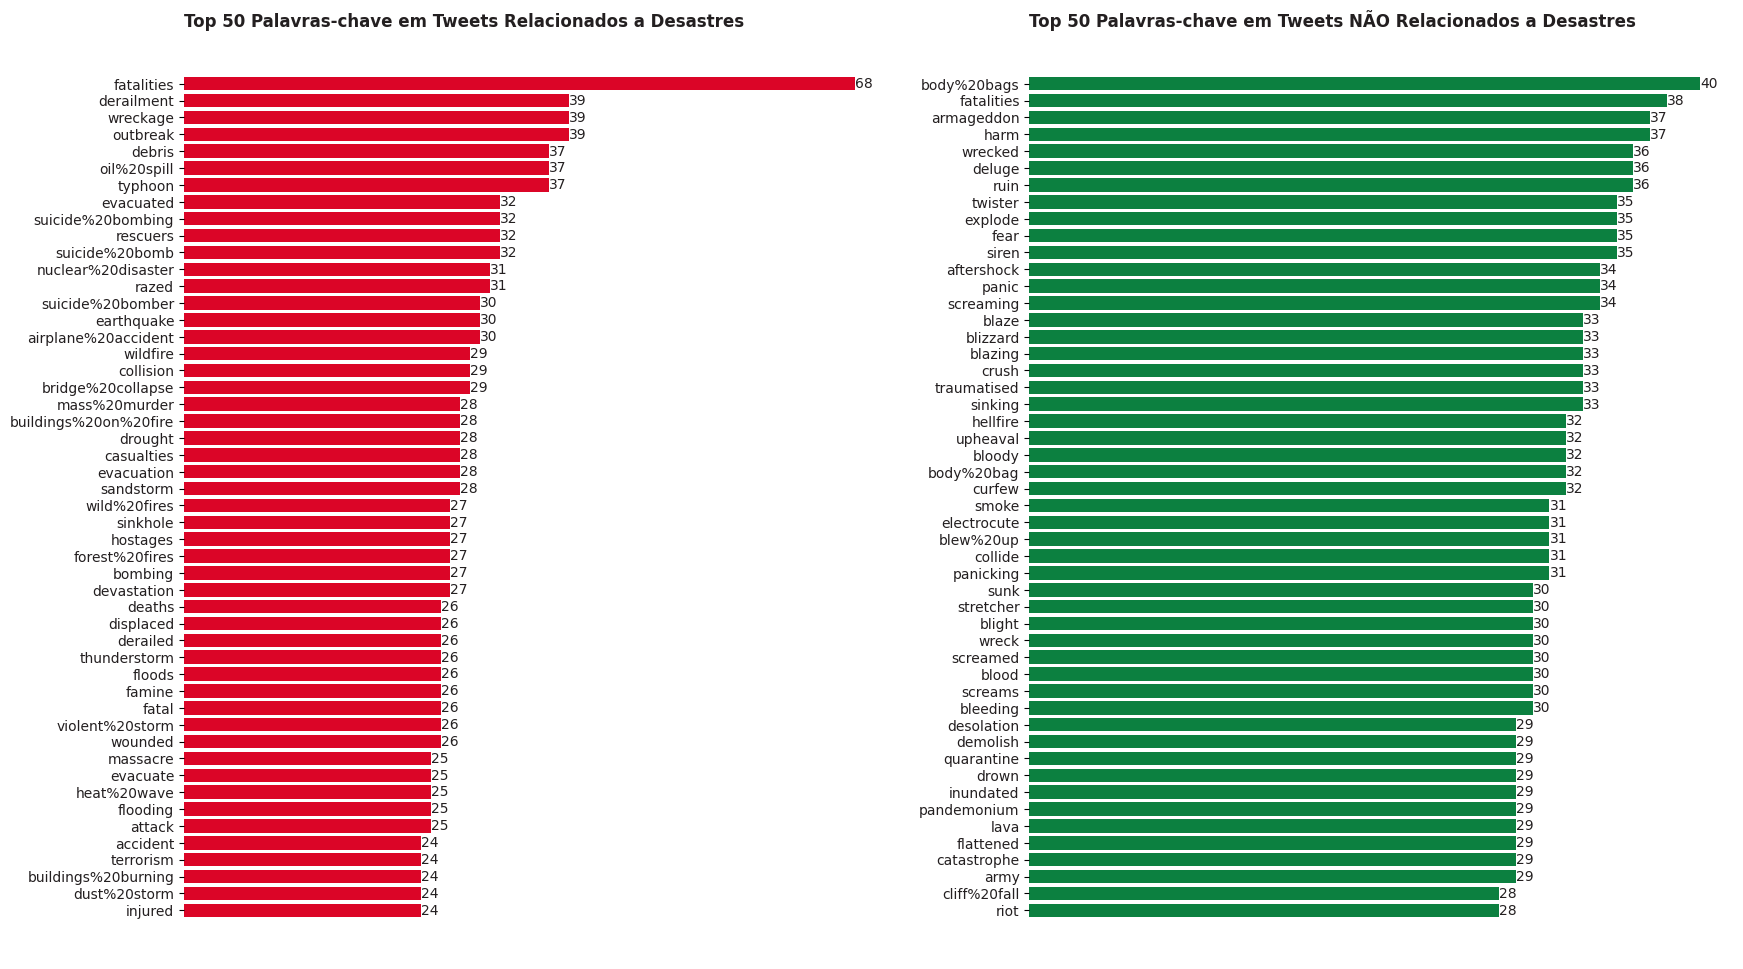

In [20]:
# Agrupando os dados.
disaster_df = clean_df.loc[clean_df['target'] == 1]
non_disaster_df = clean_df.loc[clean_df['target'] == 0]
keywords_disaster_tweets = disaster_df.groupby(['keyword'])[['keyword']].count().rename(columns={'keyword': 'count'}).sort_values(by=['count'], ascending=False).head(50).reset_index()
keywords_non_disaster_tweets = non_disaster_df.groupby(['keyword'])[['keyword']].count().rename(columns={'keyword': 'count'}).sort_values(by=['count'], ascending=False).head(50).reset_index()

# Plot e customização.
#colors = plt.cm.viridis(np.linspace(0, 1, len(keywords_disaster_tweets)))
fig, ax = plt.subplots(1, 2, figsize=(20, 12))

# Disaster.
bars = ax[0].barh(y=keywords_disaster_tweets['keyword'], width=keywords_disaster_tweets['count'], color=VERMELHO1)
ax[0].bar_label(bars, color=CINZA1)
ax[0].set_title('Top 50 Palavras-chave em Tweets Relacionados a Desastres', color=CINZA1, fontweight='bold', loc='left')
ax[0].set_yticks(ticks=range(50), labels=keywords_disaster_tweets['keyword'].tolist(), color=CINZA1)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].get_xaxis().set_visible(False)
ax[0].invert_yaxis()

# Non-Disaster.
bars = ax[1].barh(y=keywords_non_disaster_tweets['keyword'], width=keywords_non_disaster_tweets['count'], color=VERDE1)
ax[1].bar_label(bars, color=CINZA1)
ax[1].set_title('Top 50 Palavras-chave em Tweets NÃO Relacionados a Desastres', color=CINZA1, fontweight='bold', loc='left')
ax[1].set_yticks(ticks=range(50), labels=keywords_non_disaster_tweets['keyword'].tolist(), color=CINZA1)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].invert_yaxis()

- Ambos os tipos de tweet (relacionados a desastres e não relacionados) compartilham termos que podem ser interpretados em diferentes contextos. Portanto, talvez modelos como 'word of vectors', que levam em conta essas relações semânticas (ao contrário de modelos mais simples como o 'bag of words') em espaços vetoriais contínuos sejam mais apropriados para a diferenciação dos dois tipos.
- Tweets relacionados a desastres têm uma ênfase clara em eventos naturais, acidentes e atos de violência.
    - Exemplos de palavras-chave:
        - Desastres naturais: "earthquake," "wildfire", "heat wave", "dust storm".
        - Acidentes: "derailed", "accident".
        - Violência e terrorismo: "suicide bomber", "bombing", "terrorism".
        - Saúde: "fatalities", "wounded".
        - Desastres ambientais: "oil spill", "forest fires".
- Tweets não relacionados a desastres têm uma ênfase em emoções intensas, cenários caóticos e elementos associados a consequências graves. Isso faz sentido, pois, em se tratando de uma metáfora ou uma referência a algo que não é real, o exagero tende a prevalecer.
    - Exemplos de palavras-chave:
        - Destruição e caos:  "ruin", "explode", 'destruction".
        - Emoções: "panic", "fear".
        - Consequências graves: "body bags", "bloody".
        - Referências a ambientes de emergência: "army", "quarantine", "catastrophe". 

#### 3.4 Quais são as palavras mais frequentes associadas aos tweets de desastres? E aos tweets não relacionados a desastres? 

In [21]:
token_words_clean = ' '.join([tweet for tweet in clean_df['clean_text']])
token_words_raw = ' '.join([tweet for tweet in clean_df['text']])

print(f'Há, no total, {len(token_words_clean)} palavras para os textos limpos.')
print(f'Há, no total, {len(token_words_raw)} palavras para os textos brutos.')

Há, no total, 449778 palavras para os textos limpos.
Há, no total, 776810 palavras para os textos brutos.


- Note como foi possível reduzir o número de palavras através da limpeza, priorizando aquelas que têm relevância semântica e contextual, removendo stopwords, links, pontuações, caracteres especiais, tags html, etc. Isso ajuda muito ao modelar e analisar o problema. Haverá uma redução de dimensionalidade e um melhor desempenho.

- Tweets relacionados a desastres:

In [22]:
token_words_disaster_clean = ' '.join([tweet for tweet in disaster_df['clean_text']])
print(f'Há {len(token_words_disaster_clean)} palavras para tweets relacionados a desastres, para os textos limpos.')

Há 210732 palavras para tweets relacionados a desastres, para os textos limpos.


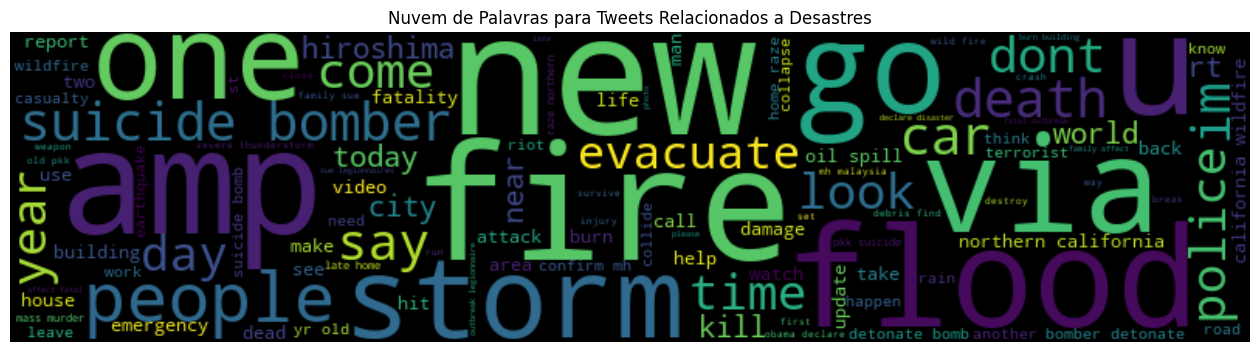

In [23]:
wordcloud = WordCloud(width=800, height=200, random_state=42, max_font_size=110).generate(token_words_disaster_clean)

plt.figure(figsize=(16, 10))
plt.title('Nuvem de Palavras para Tweets Relacionados a Desastres')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

- Tweets não relacionados a desastres:

In [24]:
token_words_non_disaster_clean = ' '.join([tweet for tweet in non_disaster_df['clean_text']])
print(f'Há {len(token_words_non_disaster_clean)} palavras para tweets NÃO relacionados a desastres, para os textos limpos.')

Há 239045 palavras para tweets NÃO relacionados a desastres, para os textos limpos.


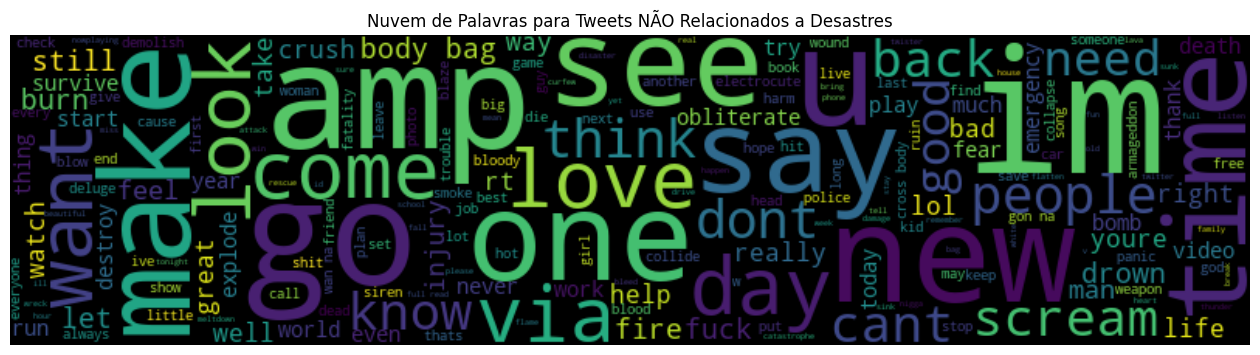

In [25]:
wordcloud = WordCloud(width=800, height=200, random_state=42, max_font_size=110).generate(token_words_non_disaster_clean)

plt.figure(figsize=(16, 10))
plt.title('Nuvem de Palavras para Tweets NÃO Relacionados a Desastres')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

- É possível ratificar o insight obtido a partir das keywords. Tweets relacionados a desastres têm alta frequência de palavras referindo-se a desastres em si, além das genéricas (one, see, come, go, etc.), sejam naturais, ambientais, de violência, entre outros. Observe a predominância de palavras como "fire", "evacuate" e "storm".
- Já para tweets não relacionados observe a maior frequência de palavras que expressam sentimentos, além das genéricas (one, see, come, go, etc.). É o caso de "love", "scream", "help", "want", etc.

#### 3.5 Quais tendências, representadas por hashtags, são mais frequentes entre tweets relacionados a desastres? E entre os tweets não relacionados a desastres?


- Hashtags para tweets relacionados a desastres.

In [26]:
# re.findall vai encontrar todas as ocorrências do padrão especificado.
# 'r'#\s*(\w+)', '#' indica o início de uma hashtag, '\s*' corresponde a zero ou mais espaços em branco, '(\w+)' captura a palavra após a hashtag.
# o ''.join junta todas as strings na coluna em uma única string, que é passada como texto para procurar as hashtags.
hashtag_words_disaster = re.findall(r'#\s*(\w+)', ''.join(disaster_df['clean_text']))
# Conta a frequência de cada palavra na lista acima.
hashtag_words_count = Counter(hashtag_words_disaster)
hashtags_disaster_df = pd.DataFrame(list(hashtag_words_count.items()), columns=['word', 'count'])
hashtags_disaster_df = hashtags_disaster_df.sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

- Hashtags para tweets NÃO relacionados a desastres.

In [27]:
hashtag_words_non_disaster = re.findall(r'#\s*(\w+)', ''.join(non_disaster_df['clean_text']))
hashtag_words_count = Counter(hashtag_words_non_disaster)
hashtags_non_disaster_df = pd.DataFrame(list(hashtag_words_count.items()), columns=['word', 'count'])
hashtags_non_disaster_df = hashtags_non_disaster_df.sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

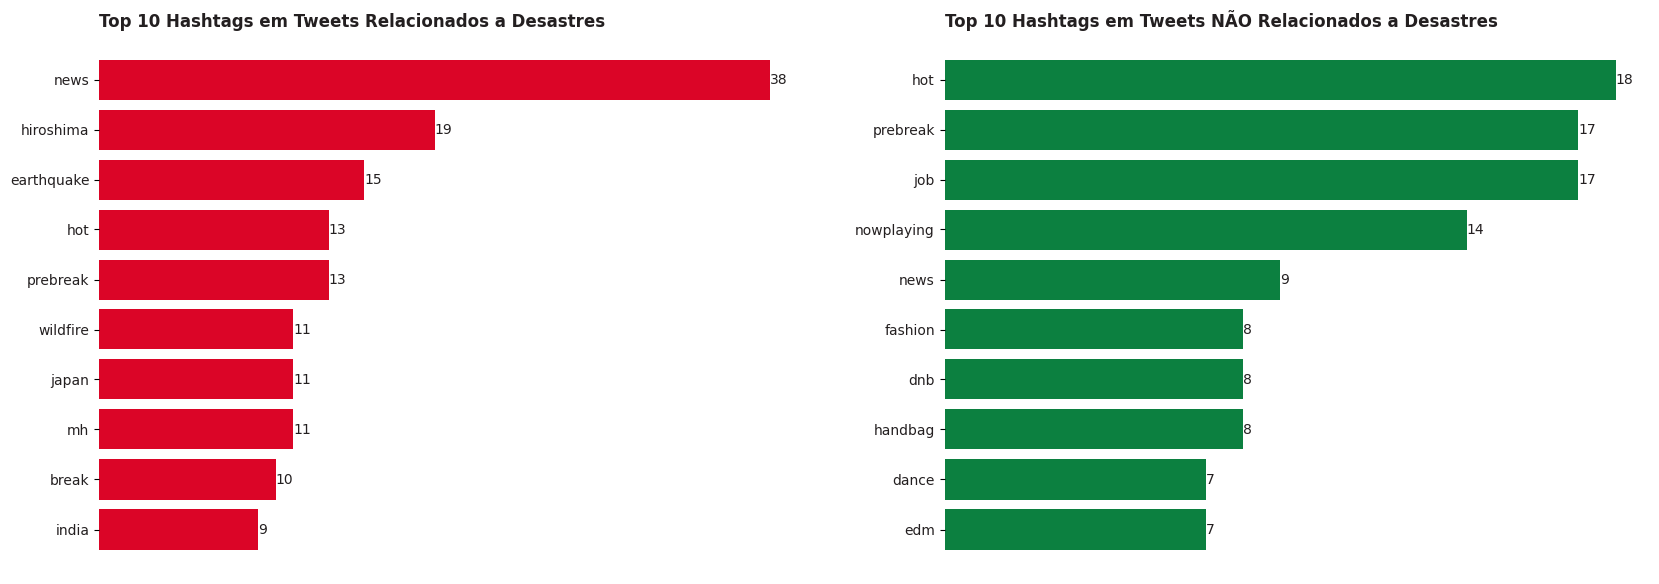

In [28]:
# Plotting and customizing.
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Disaster.
bars = ax[0].barh(y=hashtags_disaster_df['word'], width=hashtags_disaster_df['count'], color=VERMELHO1)
ax[0].bar_label(bars, color=CINZA1)
ax[0].set_title('Top 10 Hashtags em Tweets Relacionados a Desastres', color=CINZA1, fontweight='bold', loc='left')
ax[0].set_yticks(ticks=range(10), labels=hashtags_disaster_df['word'].tolist(), color=CINZA1)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].get_xaxis().set_visible(False)
ax[0].invert_yaxis()

# Non-Disaster.
bars = ax[1].barh(y=hashtags_non_disaster_df['word'], width=hashtags_non_disaster_df['count'], color=VERDE1)
ax[1].bar_label(bars, color=CINZA1)
ax[1].set_title('Top 10 Hashtags em Tweets NÃO Relacionados a Desastres', color=CINZA1, fontweight='bold', loc='left')
ax[1].set_yticks(ticks=range(10), labels=hashtags_non_disaster_df['word'].tolist(), color=CINZA1)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].invert_yaxis()

- É possível perceber que, de longe, a hashtag mais comum para tweets relacionados a desastres é a '#news". Isso nos indica que a maioria desses tweets corresponde a canais de notícia, relatando os eventos em questão. Em seguida, "earthquake" e "wildfire", ratificam a maior presença de palavras-chave relacionadas aos desastres em si. Neste caso, desastres ambientais. Outrossim, a presença de palavras como "hiroshima", "japan" e "india" sugere uma ênfase em eventos específicos relacionados a desastres naturais em áreas geográficas específicas.
- Já nos tweets que não estão relacionados com desastres há um conteúdo diversificado nas hashtags. Isso pode ser visto em palavras como "hot", "job", "fashion", "dnb" e "dance". Dito isso, é notório um foco em entretenimento, música e cultura, indicando que esses tweets podem ser mais voltados para o lazer e interesses pessoais. Finalmente, a presença de "nowplaying" e "fashion" sugere uma possível associação com atualizações diárias sobre música e moda.

#### 6. Qual é a emoção dominante nos tweets relacionados a desastres e não relacionados a desastres?
- Para cálculo da emoção, utilizarei a biblioteca TextBlob, obtendo a polaridade e a subjetividade de cada texto com o método .sentiment, para tweets relacionados a desastres e tweets não relacionados.
- Polaridade:
    - A polaridade mede a orientação do sentimento expresso no texto. Pode ser positiva, negativa ou neutra.
    - Varia de -1 (sentimento negativo) a 1 (sentimento positivo), com 0 indicando neutralidade.
- Subjetividade:
    - A subjetividade mede o grau de subjetividade ou objetividade no texto. Quanto mais subjetivo, mais opiniativo e menos factual.
    - Varia de 0 a 1, onde 0 é totalmente objetivo e 1 é totalmente subjetivo.

- Polaridade e subjetividade dos tweets.

In [29]:
clean_df['polarity'] = clean_df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
clean_df['subjectivity'] = clean_df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

- Vamos acessar a descrição e a distribuição.

In [30]:
clean_df.groupby(['target'])[['polarity', 'subjectivity']].describe()

polarity                                                   subjectivity                                              
          count      mean       std  min  25%  50%       75%  max        count      mean       std  min  25%  50%   75%  max
target                                                                                                                      
0        4342.0  0.055657  0.267620 -1.0  0.0  0.0  0.136364  1.0       4342.0  0.302526  0.325824  0.0  0.0  0.2  0.55  1.0
1        3271.0  0.001059  0.220229 -1.0  0.0  0.0  0.000000  1.0       3271.0  0.238937  0.304095  0.0  0.0  0.0  0.45  1.0

- Aparentemente, não há resultados/diferenças significativas. Pelo menos metade dos tweets (mediana), tanto para aqueles relacionados a desastres, quanto para os não relacionados, apresentam polaridade neutra e uma 'subjetividade objetiva'.

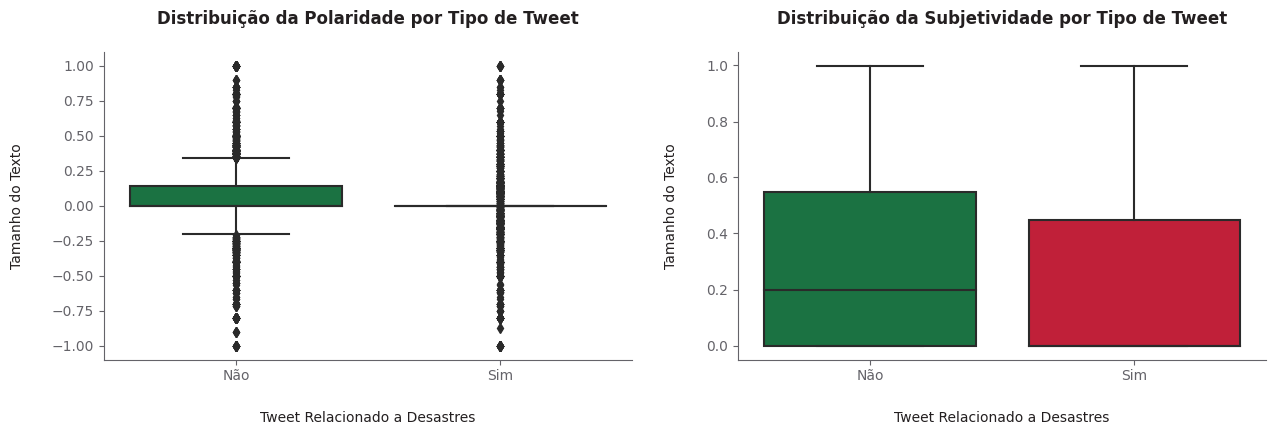

In [31]:
# Plotting and customizing.
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data=clean_df, x='target', y='polarity', orient='v', palette=[VERDE1, VERMELHO1], ax=ax[0])
ax[0].set_title('Distribuição da Polaridade por Tipo de Tweet', color=CINZA1, fontweight='bold', pad=20)
ax[0].set_xticks(range(2))
ax[0].set_xticklabels(['Não', 'Sim'])
ax[0].set_ylabel('Tamanho do Texto', color=CINZA1, labelpad=20)
ax[0].set_xlabel('Tweet Relacionado a Desastres', color=CINZA1, labelpad=20)
ax[0].tick_params(axis='x', colors=CINZA4)
ax[0].tick_params(axis='y', colors=CINZA4)
ax[0].spines['left'].set_color(CINZA4)
ax[0].spines['bottom'].set_color(CINZA4)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.boxplot(data=clean_df, x='target', y='subjectivity', orient='v', palette=[VERDE1, VERMELHO1], ax=ax[1])
ax[1].set_title('Distribuição da Subjetividade por Tipo de Tweet', color=CINZA1, fontweight='bold', pad=20)
ax[1].set_xticks(range(2))
ax[1].set_xticklabels(['Não', 'Sim'])
ax[1].set_ylabel('Tamanho do Texto', color=CINZA1, labelpad=20)
ax[1].set_xlabel('Tweet Relacionado a Desastres', color=CINZA1, labelpad=20)
ax[1].tick_params(axis='x', colors=CINZA4)
ax[1].tick_params(axis='y', colors=CINZA4)
ax[1].spines['left'].set_color(CINZA4)
ax[1].spines['bottom'].set_color(CINZA4)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

#### 4. Conclusão

- Os objetivos foram atingidos, foi possível obter insights ocultos nos dados acerca de tweets relacionados a desastres vs tweets não relacionados.
- A limpeza dos textos foi fundamental. Removemos links, tags html, pontuações, caracteres especiais, stop words, números, @ de usuários, colocamos tudo em lowercase, e aplicamos a lematização com part of speech tags a fim de torná-la eficiente.
- Os principais insights obtidos foram:
    - Ambos os tipos de tweet (relacionados a desastres e não relacionados) compartilham termos que podem ser interpretados em diferentes contextos. Portanto, talvez modelos como 'word of vectors', que levam em conta essas relações semânticas (ao contrário de modelos mais simples como o 'bag of words') em espaços vetoriais contínuos sejam mais apropriados para a diferenciação dos dois tipos.
        - Tweets relacionados a desastres têm uma ênfase clara em eventos naturais, acidentes e atos de violência.
            - Exemplos de palavras-chave:
                - Desastres naturais: "earthquake," "wildfire", "heat wave", "dust storm".
                - Acidentes: "derailed", "accident".
                - Violência e terrorismo: "suicide bomber", "bombing", "terrorism".
                - Saúde: "fatalities", "wounded".
                - Desastres ambientais: "oil spill", "forest fires".
        - Tweets não relacionados a desastres têm uma ênfase em emoções intensas, cenários caóticos e elementos associados a consequências graves. Isso faz sentido, pois, em se tratando de uma metáfora ou uma referência a algo que não é real, o exagero tende a prevalecer.
            - Exemplos de palavras-chave:
                - Destruição e caos:  "ruin", "explode", 'destruction".
                - Emoções: "panic", "fear".
                - Consequências graves: "body bags", "bloody".
                - Referências a ambientes de emergência: "army", "quarantine", "catastrophe". 
    - De longe, a hashtag mais comum para tweets relacionados a desastres é a '#news". Isso nos indica que a maioria desses tweets corresponde a canais de notícia, relatando os eventos em questão. Em seguida, "earthquake" e "wildfire", ratificam a maior presença de palavras-chave relacionadas aos desastres em si. Neste caso, desastres ambientais. Outrossim, a presença de palavras como "hiroshima", "japan" e "india" sugere uma ênfase em eventos específicos relacionados a desastres naturais em áreas geográficas específicas.
    - Nos tweets que não estão relacionados com desastres há um conteúdo diversificado nas hashtags. Isso pode ser visto em palavras como "hot", "job", "fashion", "dnb" e "dance". Dito isso, é notório um foco em entretenimento, música e cultura, indicando que esses tweets podem ser mais voltados para o lazer e interesses pessoais. Finalmente, a presença de "nowplaying" e "fashion" sugere uma possível associação com atualizações diárias sobre música e moda.
- Agora, prosseguimos para o notebook 'modelling.ipynb', no qual iremos construir um modelo de machine learning para prever a probabilidade de um tweet estar relacionado a desastres, seguindo o fluxo do CRISP-DM.